In [27]:
import pandas as pd
from utils.trust_index import attach_distrust_index
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import numpy as np

In [2]:
df = pd.read_csv("./data/wvs/wave7.csv")
df.head()

C:\Users\WordPress\AppData\Local\Temp\ipykernel_12848\977383760.py:1: DtypeWarning: Columns (349,351) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/wvs/wave7.csv")


,Unnamed: 0,version,doi,A_WAVE,A_YEAR,A_STUDY,B_COUNTRY,B_COUNTRY_ALPHA,C_COW_NUM,C_COW_ALPHA,...,v2psorgs,v2psprbrch,v2psprlnks,v2psplats,v2xnp_client,v2xps_party,Economy ISO3,Economy Name,Year,WPFI
0,0,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,AND,Andorra,2018,77.79
1,1,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,AND,Andorra,2018,77.79
2,2,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,AND,Andorra,2018,77.79
3,3,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,...,NaN,NaN,NaN,NaN,NaN,NaN,AND,Andorra,2018,77.79
4,4,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,AND,Andorra,2018,77.79


In [3]:
df = attach_distrust_index(df)

### Interviewers observations of use?
This very basic eda will look into the correlations of the candidate features with the trust-index. This is to make sure, the features we take into account actually contain some information about the distrust index.

### Quick summary
- Most of the features can be thrown away
- Settlement type seems to the best feature
    - Passes ANOVA
    - Visual differences in boxplot
- Everything else either has concering characteristics for linear regression or / and no predicitve power 

#### `H_URBRURAL`
- Possible dummy variable which contains some general information about how developed the location is.
- Seems to have little to no predictive power

In [6]:
df.loc[:, ["H_URBRURAL", "national_distrust_index"]].groupby("H_URBRURAL").agg(["var","mean"])

national_distrust_index          
                               var      mean
H_URBRURAL                                  
-5                        0.010176  0.487329
 1                        0.019249  0.515362
 2                        0.017210  0.522402

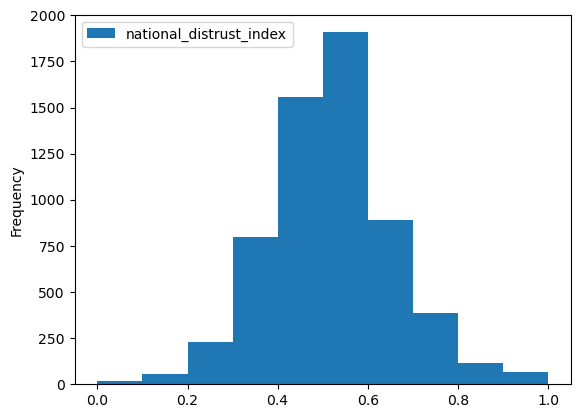

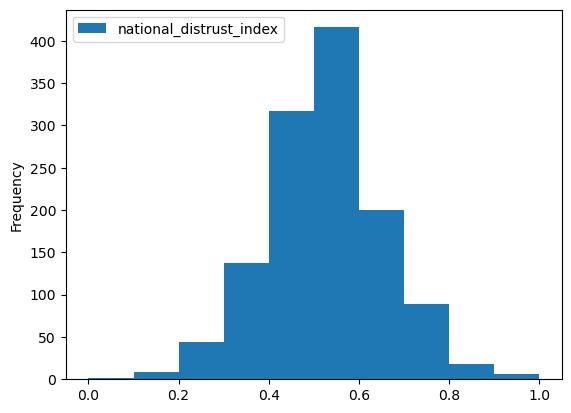

In [8]:
for i in range(1,3):
    df.loc[df.H_URBRURAL == i, ["national_distrust_index"]].plot(kind="hist")

In [35]:
f_oneway(df.national_distrust_index[df.H_URBRURAL == 1], df.national_distrust_index[df.H_URBRURAL == 2])

F_onewayResult(statistic=2.6925346602953972, pvalue=0.100862611227881)

- ANOVA yields p-value of 10 percent
- so not really significant but the best i could find so far

#### Town size code G
- Population size of the town where the interview was conducted

<Axes: xlabel='G_TOWNSIZE'>

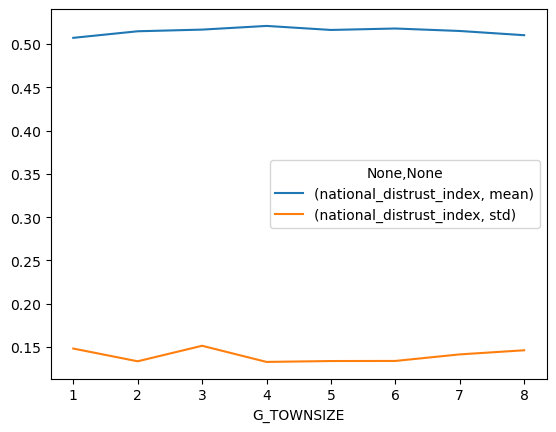

In [13]:
df.loc[df.G_TOWNSIZE > 0, ["G_TOWNSIZE", "national_distrust_index"]].groupby("G_TOWNSIZE").agg(["mean", "std"]).plot()

- Seems to be a very small quadratic trend

### time of the interview code: K
- just the time of the interview 

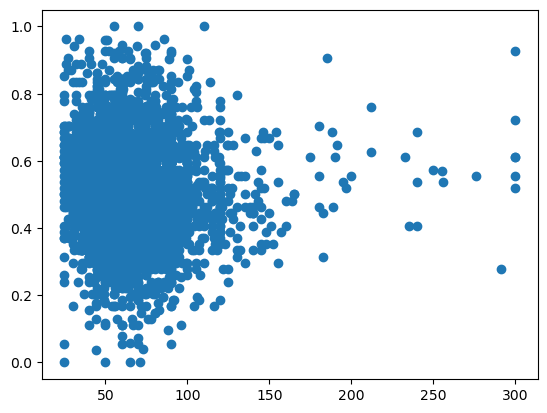

In [20]:
plt.scatter(df.K_DURATION[df.K_DURATION > 0], df.national_distrust_index[df.K_DURATION > 0])

- yeah i mean i don't even know what i was hoping for. Duration of the interview obviously does not have an influence on the distrust index

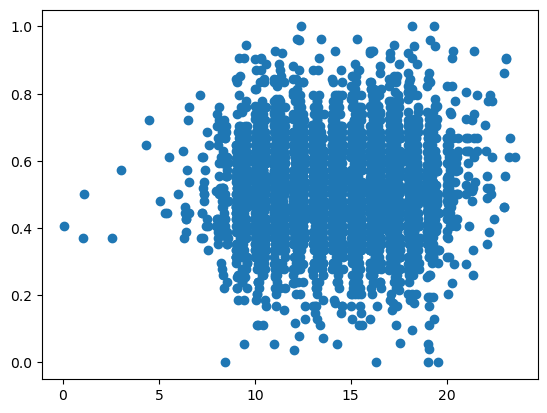

In [21]:
plt.scatter(df.K_TIME_START[df.K_TIME_START > 0], df.national_distrust_index[df.K_TIME_START > 0])

- The hypothesis of meeting working class in the afternoon, which might affect trust in the government is not really working.
#### Interview privacy code: F

In [25]:
df.loc[df.F_INTPRIVACY > 0, ["F_INTPRIVACY", "international_distrust_index"]].cov()

,F_INTPRIVACY,international_distrust_index
F_INTPRIVACY,0.146813,0.000271
international_distrust_index,0.000271,0.031240


- Correlation near zero

In [40]:
n_t_1 = df.national_distrust_index[df.F_INTPRIVACY == 1]
n_t_2 = df.national_distrust_index[df.F_INTPRIVACY == 2]

f_oneway(n_t_1, n_t_2)

F_onewayResult(statistic=0.012975424337593041, pvalue=0.9093153730480579)

- ANOVA yields p-val of almost 90% percent

#### Settlement type code: H

In [ ]:
df.H_SETTLEMENT

In [41]:
n_settle = []
for i in range(1,6):
    n_settle.append(df.national_distrust_index[df.H_SETTLEMENT == i])

f_oneway(*n_settle)

F_onewayResult(statistic=6.118885419175602, pvalue=6.526926300117851e-05)

- We finally got something significant
- Let's look closer into this:

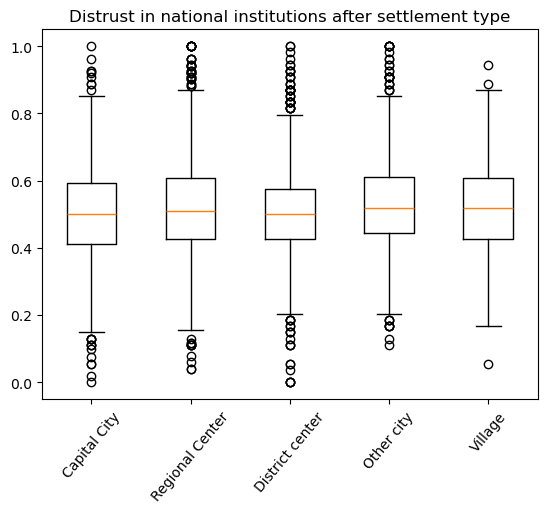

In [59]:
n_t_h = []
for i in range(1,6):
    n_t_h.append(df.national_distrust_index[df.H_SETTLEMENT == i])

labels = ["Capital City", "Regional Center", "District center", "Other city", "Village"]

plt.boxplot(n_t_h,
            tick_labels=labels)

plt.xticks(rotation=50)
plt.title("Distrust in national institutions after settlement type")
plt.show()

- Small differences
- Capital cities seem to trust the government the most
- Distrust seems to be the largest in other towns / cities